## Example of the `Text` Class Usage with "A Tale of Two Cities"

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

### Importing the `Text` class

To import the class, place the Text.py file in the current directory.

In [ ]:
from Text import Text

### Initializing the `Text` class

The `Text` class san be initialized providing a path to text file

In [19]:
address = r'dickens_1859_a_tale_of_two_cities.txt'
text_analysis = Text(address)

### Class fields:
1. `size` — total word count in the text
2. `different_words_count` — number of unique words
3. `frequencies_empirical` — word frequencies (sorted in descending order)
4. `frequencies_range` — possible word frequencies in text
5. `r_nk_empirical` — number of words with frequency >= k in text with size n
6. `f_0` — frequency such that the ranks for it become greater than edge
7. `ranks_empirical` — empirical ranks (1 to number of unique words)

In [20]:
print('Text size:', text_analysis.size)
print('Number of unique words:', text_analysis.different_words_count)
print('Word frequencies in text:', text_analysis.frequencies_empirical)
print('Possible frequencies:', text_analysis.frequencies_range)
print('Empirical r_nk:', text_analysis.r_nk_empirical)
print('f_0:', text_analysis.f_0)
print('ranks_empirical:', text_analysis.ranks_empirical)

Text size: 138194
Number of unique words: 9694
Word frequencies in text: [8023 4999 4007 ...    1    1    1]
Possible frequencies: [   1    2    3 ... 8021 8022 8023]
Empirical r_nk: [9694 5475 3925 ...    1    1    1]
f_0: 30
ranks_empirical: [   1    2    3 ... 9692 9693 9694]


## Technical methods of the `Text` class

### Method `r_nk_approx`

Approximate r(n, k) using a Zipf-like distribution with parameters (a, q, m),
where r(n, k) is the mathematical expectation of number of words that
appear not less than k times in the text contains n words
and m is the number of all possible words.

Combines:
1. Exact calculation for low ranks (rank <= m_0).
2. Approximation by numerical integration for the rank > m_0.

$$r_{n,k,m_0,m}^* (\alpha,q):=
\sum_{i=1}^{m_0} \left(1-
\sum_{j=0}^{k-1} b_{n,j}(p_i(\alpha,q))\right)
+ \int_{m_0}^{m} \left(1-\sum_{j=0}^{k-1} b_{n,j}(p_i(\alpha,q))\right)\, di$$

$$p_i(\alpha,q)=c(i+q)^{-\alpha}, \ \ i=1, 2, \ldots,m.$$

$$b_{n,k}(p):=\binom{n}{k} p^k (1-p)^{n-k}.$$

1. Parameters.

`a: float` — Zipf exponent.

`q: float` — Mandelbrot shift.

`m: float` — number of all possible words.

`m_0: int (optional, default = 400)` — initial value to approximate the tail of the distribution by numerical integration.

`n_knots: int  (optional, default = 100)` — number of knotes for numerical integration.

2. Return.

Array, where each element result[k] represents
the mathematical expectation of the number of words that appear in the text ≥ k times calculated 
based on the parameters (a, q, m).

In [7]:
some_a = 1.2
some_q = 5.2
some_m = 10000

text_analysis.r_nk_approx(some_a, some_q, some_m)

array([5.93997665e+003, 4.26472664e+003, 3.21230549e+003, ...,
       4.64743081e-202, 3.21594896e-202, 2.22509197e-202])

### Method `powell_optimization`

1. Parameters.

- `a_start: float (optional, default = 1.2)` — initial value of parameter a.

- `q_start: float (optional, default = 10.0)` — initial value of parameter q.

- `f_start: int (optional, default = 1)` — starting frequency for error calculation.

- `f_final: int (optional, default = None)` — final frequency for error calculation.

- `a_bounds: list (optional, default = [0.0, 3.0])` — bounds of parameter a.

- `q_bounds: list (optional, default = [-1.0, 500.0])` — bounds of parameter q.

- `init_m_bound: list or NoneType (optional, default = 600000)` — initial max M.

- `init_q_bound: float (optional, default = 20)` — initial max Q.

- `init_m_count: float (optional, default = 20)` — number of variants of initial parameter M estimates.

- `init_q_count: float (optional, default = 10)` — number of variants of initial parameter Q estimates.

- `max_error_bound: float (optional, default = 10 + 1e-6)` — maximum permissible approximation error.

- `verbose: list (optional, default = True)` — True if optimization progress is shown.

2. Update object's attributes:

- `r_nk_prediction_1` with list of approximated r_nk after the first optimization.
- `estimated_parameters_1` with list of estimated parameters a, q, m after the first optimization.
- `approx_std_1` with approximation std after the first optimization.

- `r_nk_prediction_2` with list of approximated r_nk after the second optimization.
- `estimated_parameters_2` with list of estimated parameters a, q, m after the second optimization.
- `approx_std_2` with approximation std after the second optimization.

- `r_nk_prediction_full` with list of approximated r_nk after the both optimizations.
- `full_approx_std` with approximation std after the both optimizations.

In [6]:
text_analysis.powell_optimization()

print(f'Final parameters: ')
print(f'Optimization 1: alpha_1 = {text_analysis.estimated_parameters_1[0]}, '
      f'q_1 = {text_analysis.estimated_parameters_1[1]}, M_1 = {text_analysis.estimated_parameters_1[2]}')
print('sigma_1 =', text_analysis.approx_std_1)
print(f'Optimization 2: alpha_2 = {text_analysis.estimated_parameters_2[0]}, '
      f'q_2 = {text_analysis.estimated_parameters_2[1]}, M_2 = {text_analysis.estimated_parameters_2[2]}')
print('sigma_2 =', text_analysis.approx_std_2)
print('Final std sigma =', text_analysis.full_approx_std)

Best start m = 40762.73684210527
Best start q = 6.0
Optimization 1. Current parameters: a = 1.135363, q = 4.903834, m = 9694.00000051104. Current mse: 2.3926618903509125766

Optimization 2. Current parameters: a = 1.123428, q = 8.990200, m = 102022.48009803265. Current mse: 389.4446800655721789Final parameters: 
Optimization 1: alpha_1 = 1.1353628827711975, q_1 = 4.903833534627636, M_1 = 9694
sigma_1 = 1.5468231606588687
Optimization 2: alpha_2 = 1.1234280915995367, q_2 = 8.990199859631074, M_2 = 102022
sigma_2 = 19.734352790587614
Final std sigma = 1.959578020043207


## Approximation visualization

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def make_plot(text_object: Text, prediction: np.ndarray):
    # Calculate estimated r(n,k) using optimized parameters
    r_nk_est = prediction
    # Round estimated values to integers for frequency counts
    r_nk_est_rounded = np.round(r_nk_est, 0)

    # Calculate exact word counts per frequency
    # Difference between consecutive r(n,k) values gives count of words at each frequency
    exact_counts = (r_nk_est_rounded[:-1] - r_nk_est_rounded[1:]).astype(int)
    exact_counts = np.append(exact_counts, r_nk_est_rounded[-1])  # Add last frequency count

    # Reconstruct rank-frequency distribution
    ranks_new = []
    freq_new = []
    current_rank = 1

    # For each frequency level, create corresponding ranks
    for freq, count in zip(range(1, len(exact_counts) + 1), exact_counts.astype(int)):
        ranks_new.extend(range(current_rank, current_rank + count))  # Assign ranks
        freq_new.extend([freq] * count)  # Repeat frequency for each word
        current_rank += count  # Increment rank counter

    plt.figure(figsize=(10, 6))

    # Plot: Rank-frequency distribution
    plt.loglog(text_object.ranks_empirical, text_object.frequencies_empirical,
                 'o', markersize=2., label="Empirical", color="blue")
    plt.loglog(ranks_new, freq_new[::-1],
                 label="Estimated", color="red")

    plt.xlabel("Rank",fontsize=16)
    plt.ylabel("Frequency",fontsize=16)
    plt.legend(fontsize=16)
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tick_params(axis='both', labelsize=16)
    plt.tight_layout()
    plt.show()

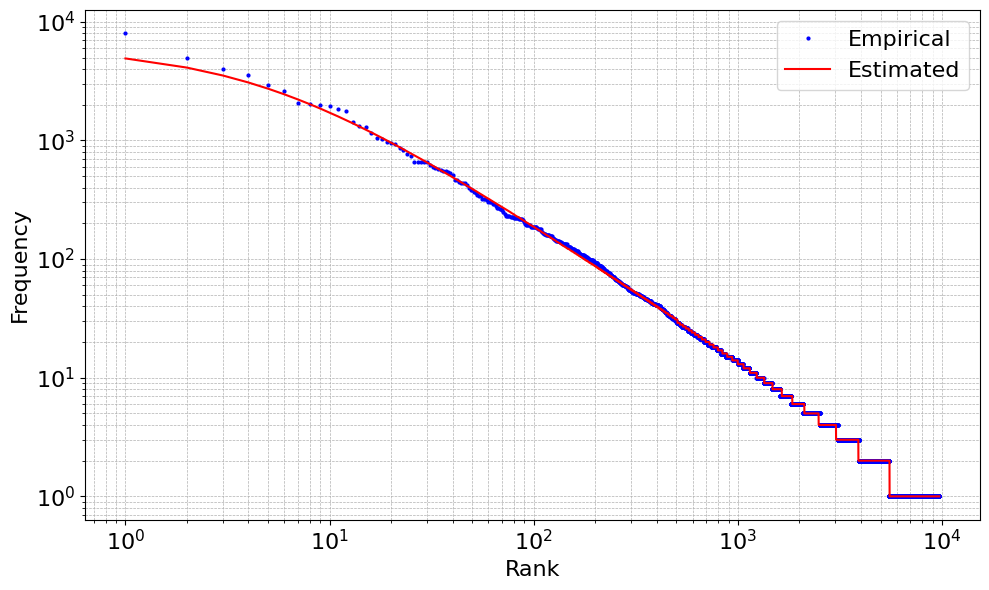

In [18]:
make_plot(text_analysis, text_analysis.r_nk_prediction_full)